In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("Heart_Disease_Prediction.csv")

df.head()
df.columns


Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [2]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.tail()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [4]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
r= df.shape
print(f"Rows: {r}")   
print(f"Columns: {r[1]}")

Rows: (270, 14)
Columns: 14


In [7]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [9]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
numeric_columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')

C:\Users\ASIFUR\AppData\Local\Temp\ipykernel_12720\3601564888.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col] for col in numeric_columns], labels=numeric_columns)


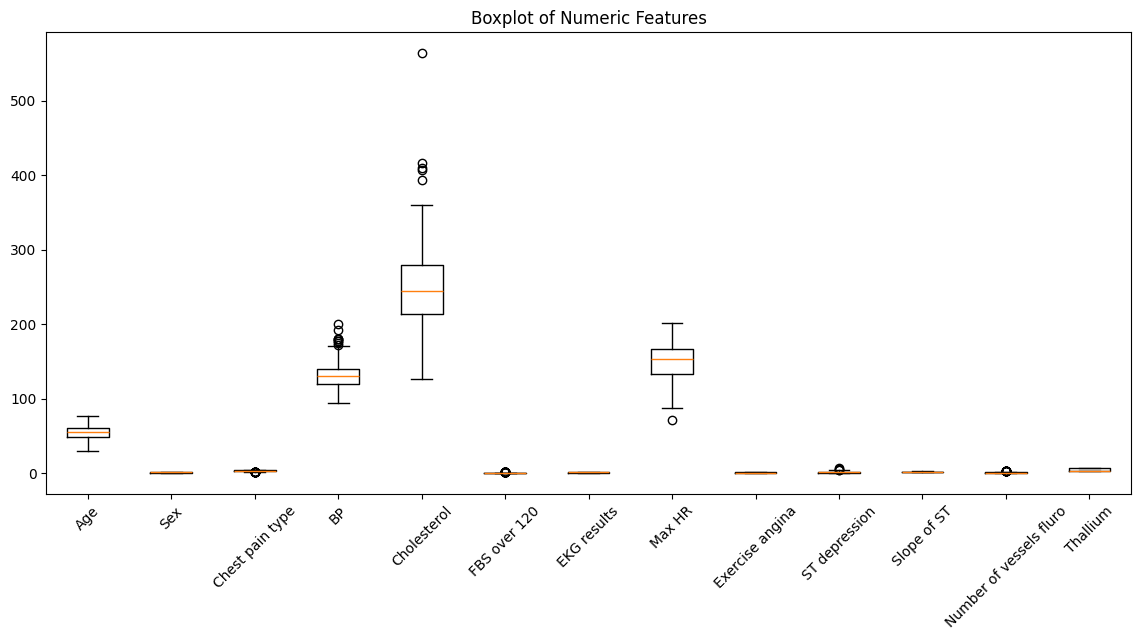

In [10]:
plt.figure(figsize=(14, 6))
plt.boxplot([df[col] for col in numeric_columns], labels=numeric_columns)
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Features")
plt.show()

In [9]:
Q1 = df['BP'].quantile(0.25)
Q3 = df['BP'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
bp_outliers = df[(df['BP'] < lower_bound) | (df['BP'] > upper_bound)]
print(f"Number of outliers in 'BP': {bp_outliers.shape[0]}")

Number of outliers in 'BP': 9


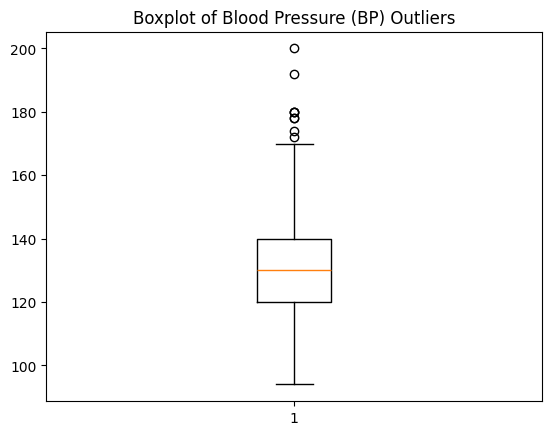

In [10]:
plt.boxplot(df['BP'])
plt.title("Boxplot of Blood Pressure (BP) Outliers")
plt.show()

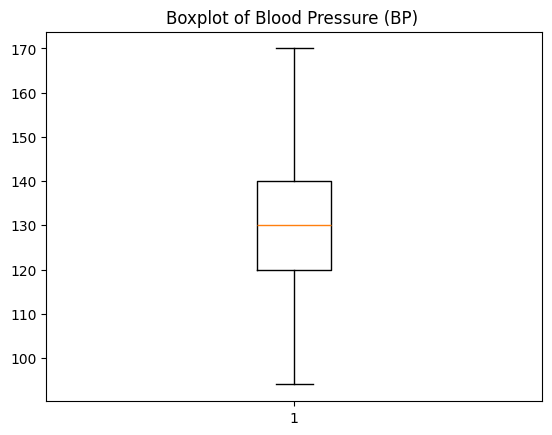

In [11]:

df= df[(df['BP'] >= lower_bound) & (df['BP'] <= upper_bound)]

plt.boxplot(df['BP'])
plt.title("Boxplot of Blood Pressure (BP) ")
plt.show()


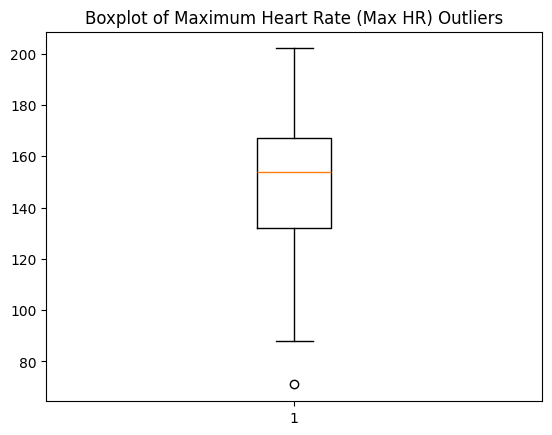

In [12]:
plt.boxplot(df['Max HR'])
plt.title("Boxplot of Maximum Heart Rate (Max HR) Outliers")
plt.show()

In [13]:
numeric_columns 

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')

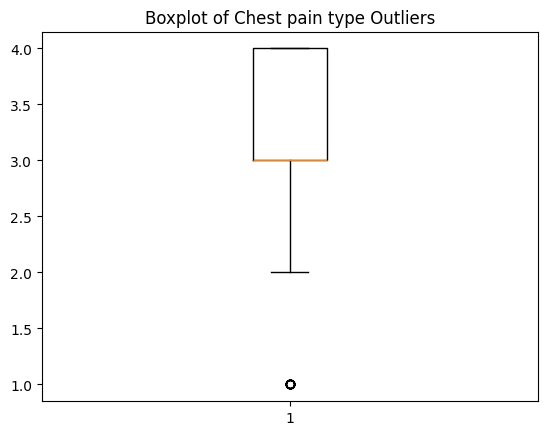

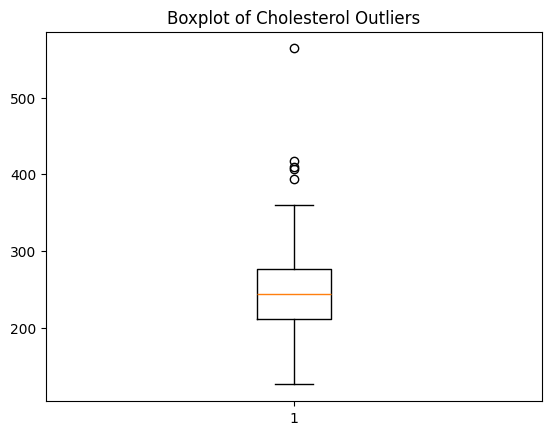

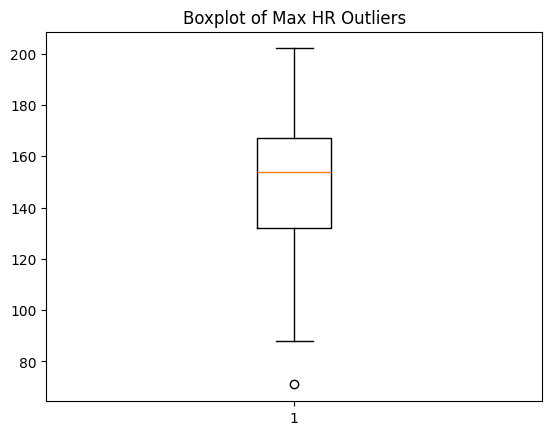

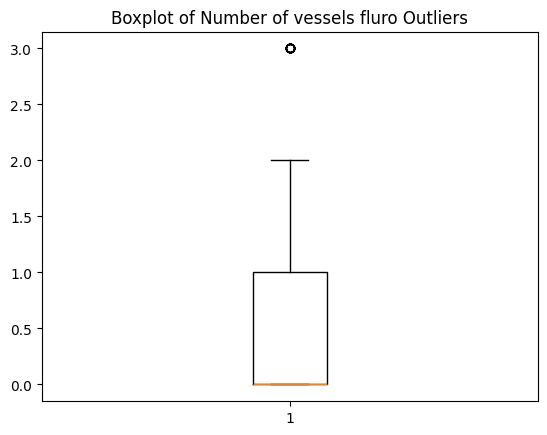

In [14]:
outliers= ["Chest pain type","Cholesterol",'Max HR', "Number of vessels fluro"]

for col in outliers:
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col} Outliers")
    plt.show()

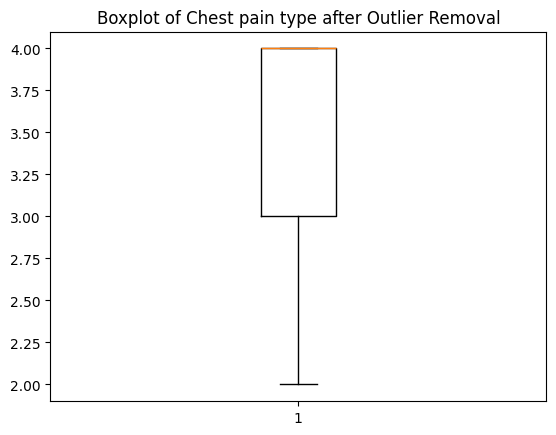

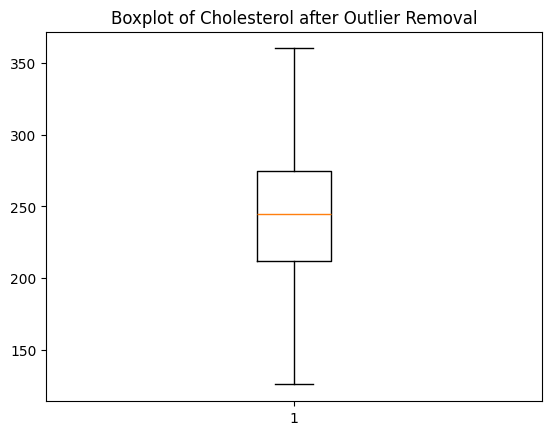

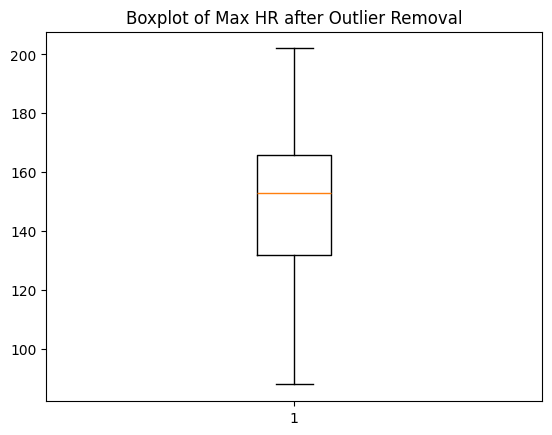

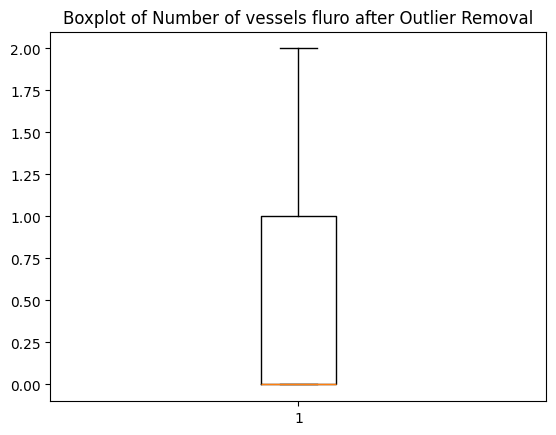

In [15]:
for col in outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col} after Outlier Removal")
    plt.show()

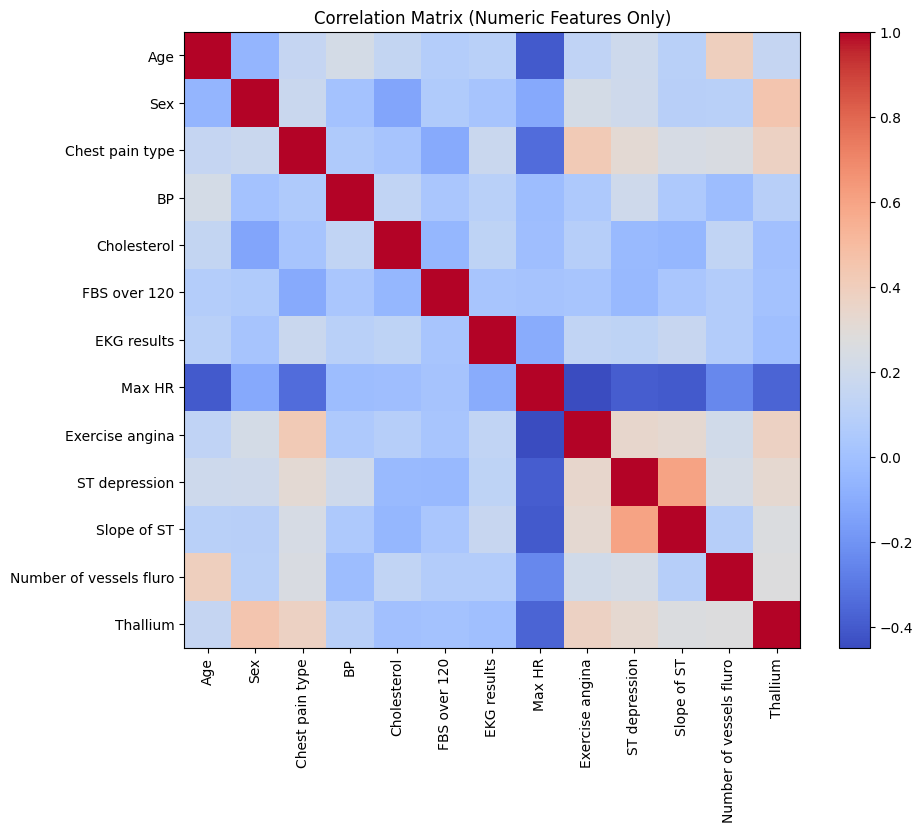

In [16]:
corr_matrix = df.select_dtypes(include=["int64", "float64"]).corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


In [17]:
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

threshold = 0.65

to_ignore = []

for col in upper_triangle.columns:
    if any(upper_triangle[col].abs() >= threshold):
        to_ignore.append(col)

print("Features to ignore (highly correlated):")
print(to_ignore)

df["Heart Disease"]=df["Heart Disease"].map({"Absence":0,"Presence":1})


Features to ignore (highly correlated):
[]


In [18]:
target_corr = df.corr()["Heart Disease"].abs().sort_values(ascending=False)
print(target_corr)



Heart Disease              1.000000
Thallium                   0.597205
Chest pain type            0.483193
ST depression              0.467471
Number of vessels fluro    0.465941
Exercise angina            0.443879
Max HR                     0.419678
Sex                        0.363000
Slope of ST                0.348949
Age                        0.201173
EKG results                0.193691
Cholesterol                0.121243
BP                         0.092703
FBS over 120               0.012722
Name: Heart Disease, dtype: float64


In [19]:
target = "Heart Disease"

target_corr = df.corr()[target].abs()

low_threshold = 0.099

low_dependency_features = target_corr[
    (target_corr < low_threshold) & (target_corr.index != target)
].index.tolist()

print("Low dependency features:")
print(low_dependency_features)


Low dependency features:
['BP', 'FBS over 120']


In [20]:
df = df.drop(columns=low_dependency_features)

In [21]:
df.head()

,Age,Sex,Chest pain type,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
2,57,1,2,261,0,141,0,0.3,1,0,7,1
3,64,1,4,263,0,105,1,0.2,2,1,7,0
4,74,0,2,269,2,121,1,0.2,1,1,3,0
5,65,1,4,177,0,140,0,0.4,1,0,7,0
6,56,1,3,256,2,142,1,0.6,2,1,6,1


In [22]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, 2 to 268
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      218 non-null    int64  
 1   Sex                      218 non-null    int64  
 2   Chest pain type          218 non-null    int64  
 3   Cholesterol              218 non-null    int64  
 4   EKG results              218 non-null    int64  
 5   Max HR                   218 non-null    int64  
 6   Exercise angina          218 non-null    int64  
 7   ST depression            218 non-null    float64
 8   Slope of ST              218 non-null    int64  
 9   Number of vessels fluro  218 non-null    int64  
 10  Thallium                 218 non-null    int64  
 11  Heart Disease            218 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 22.1 KB


In [23]:
df.head()

,Age,Sex,Chest pain type,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
2,57,1,2,261,0,141,0,0.3,1,0,7,1
3,64,1,4,263,0,105,1,0.2,2,1,7,0
4,74,0,2,269,2,121,1,0.2,1,1,3,0
5,65,1,4,177,0,140,0,0.4,1,0,7,0
6,56,1,3,256,2,142,1,0.6,2,1,6,1


In [24]:
# Save the cleaned dataset
df.to_csv("Heart_Disease_Cleaned.csv", index=False)
print("Cleaned and saved 'Heart_Disease_Cleaned.csv'")

Cleaned and saved 'Heart_Disease_Cleaned.csv'
